In [4]:
from sklearn import tree
from sklearn.model_selection import train_test_split,KFold,cross_val_score,StratifiedKFold
from sklearn.metrics import f1_score,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
from mlxtend.preprocessing import minmax_scaling
import featuretools as ft
import matplotlib.pyplot as plt
import xgboost as xgb
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import pandas as pd
import math
import random
import numpy as np
from pandas_profiling import ProfileReport


c:\Users\21269\AppData\Local\Programs\Python\Python310\lib\site-packages\alteryx_open_src_update_checker\functions.py:38: UserWarning: featuretools is out-of-date: installed == 1.9.0, latest == 1.9.1
  warnings.warn(msg)


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Train.csv')

df

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
4,ID_00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12074,ID_ZZA1SES,2010-05-25,2011-05-24,Female,30,2010-05-25,1,NaN,Black,Range Rover,Ibeju/Lekki,Ibeju-Lekki,Car Classic,1
12075,ID_ZZDAC3K,2010-10-03,2011-10-02,Female,59,2010-10-03,1,NaN,NaN,NaN,NaN,NaN,Car Classic,0
12076,ID_ZZIU2XC,2010-10-10,2011-10-08,Male,34,2010-10-10,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
12077,ID_ZZRQ1NF,2010-02-27,2011-02-26,NaN,120,2010-02-27,2,NaN,White,TOYOTA,Victoria Island,Lagos,CVTP,0


In [5]:
df = pd.read_csv('Train.csv')

df['Policy Start Date'] = pd.to_datetime(df['Policy Start Date'])
df['Policy End Date'] = pd.to_datetime(df['Policy End Date'])

#df['Date'] = pd.to_datetime(df.Date, format='%Y-%m-%d')
df['startday'] = df['Policy Start Date'].dt.day
df['startmonth'] = df['Policy Start Date'].dt.month
df['startyear'] = df['Policy Start Date'].dt.year

df['endday'] = df['Policy End Date'].dt.day
#df['endmonth'] = df['Policy End Date'].dt.month
df['endyear'] = df['Policy End Date'].dt.year

df['day_duration'] = df['endday'] - df['startday']
#df['month_duration'] = df['endmonth'] - df['startmonth']
df['year_duration'] = df['endyear'] - df['startyear']

df['Policy Start Date'] = df['Policy Start Date'].apply(lambda y: pd.Timestamp(y).day_name())
df['Policy End Date'] = df['Policy End Date'].apply(lambda y: pd.Timestamp(y).day_name())

df

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,...,State,ProductName,target,startday,startmonth,startyear,endday,endyear,day_duration,year_duration
0,ID_0040R73,Friday,Friday,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,...,NaN,Car Classic,0,14,5,2010,13,2011,-1,1
1,ID_0046BNK,Monday,Monday,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,...,NaN,Car Classic,1,29,11,2010,28,2011,-1,1
2,ID_005QMC3,Sunday,Sunday,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,...,NaN,Car Classic,0,21,3,2010,20,2011,-1,1
3,ID_0079OHW,Saturday,Saturday,Male,2,2010-08-21,1,NaN,NaN,NaN,...,NaN,CarSafe,0,21,8,2010,20,2011,-1,1
4,ID_00BRP63,Sunday,Friday,Entity,20,2010-08-29,3,NaN,NaN,NaN,...,Lagos,Muuve,1,29,8,2010,31,2010,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12074,ID_ZZA1SES,Tuesday,Tuesday,Female,30,2010-05-25,1,NaN,Black,Range Rover,...,Ibeju-Lekki,Car Classic,1,25,5,2010,24,2011,-1,1
12075,ID_ZZDAC3K,Sunday,Sunday,Female,59,2010-10-03,1,NaN,NaN,NaN,...,NaN,Car Classic,0,3,10,2010,2,2011,-1,1
12076,ID_ZZIU2XC,Sunday,Saturday,Male,34,2010-10-10,1,NaN,NaN,NaN,...,NaN,CarSafe,0,10,10,2010,8,2011,-2,1
12077,ID_ZZRQ1NF,Saturday,Saturday,NaN,120,2010-02-27,2,NaN,White,TOYOTA,...,Lagos,CVTP,0,27,2,2010,26,2011,-1,1


In [75]:
df1 = df.copy(deep=True)

df1['Weekend'] = [(lambda x: 1 if (x == 'Saturday' or x == 'Sunday') else 0)(i) for i in df1['Policy Start Date']]

df1.Gender = [(lambda x: x if (x == 'Male' or x == 'Female') else 'other')(i) for i in df.Gender]

#Replacing age by the mean of other ages if 100<age or 18>age
ages_mean = np.median([i for i in df1.Age if (i > 18 or i <80)])



df1.Age = df1.Age.replace([j for j in df1.Age if (j < 18 or j > 80)],ages_mean)

df1.Age = df1.Age.apply(lambda x: int(x))

for i in df1.columns:
    #Replacing dates with their corresponding days in the week
    
    if i != 'target':
#        if 'Date' in i:
#            df1[i] = df1[i].apply(lambda y: pd.Timestamp(y).day_name())

        #Same thing Using Label encoder:
        df1[i] = LabelEncoder().fit_transform(df1[i])

df1 = minmax_scaling(df1,columns=[i for i in df1.columns if i != 'target'])



#Replacing car_category nan values by the mean:
car_category_mean = np.mean([i for i in df1.Car_Category if i != 1])

df1.Car_Category = df1.Car_Category.replace([1],(car_category_mean))

#Replacing car color nan values bu the mean:
car_colour_mean = np.median([i for i in df1.Subject_Car_Colour if i != 1])

df1.Subject_Car_Colour = df1.Subject_Car_Colour.replace([1],(car_colour_mean))

#Replacing state nan values with the mean/median:
state_mean = np.mean([i for i in df1.State if i != 1])

df1.State = df1.State.replace([i],state_mean)

#Replacing LGA_Name feature with the mean 0.2070 :
lga_name_median = np.mean([i for i in df1.LGA_Name if i != 1])

df1.LGA_Name = df1.LGA_Name.replace([1],lga_name_median)


#Adding target row (it was removed in the minmax scaling)
df1['target'] = [j for j in df.target]


df1 = df1.drop(columns=['Policy End Date','Policy Start Date','First Transaction Date','ID'])

#Adding darkness feature to the dataset
df1['Darkness'] = [i for i in df.Subject_Car_Colour]

df1['Darkness'] = df1['Darkness'].fillna('NAN VAL')
df1['Darkness'] = [(lambda x: 1 if ('Dark' in x or 'Black' in x or 'Grey' in x) else 0)(i) for i in df1.Darkness]

#apply(lambda x: 1 if 'Black' in x else 0)
df2 = df1.copy(deep=True)



df1

,Gender,Age,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,startday,startmonth,startyear,endday,endyear,day_duration,year_duration,Weekend,target,Darkness
0,0.5,0.193548,0.000000,0.500000,0.088889,0.905405,0.600229,1.000000,0.125,0.433333,0.363636,1.0,0.400000,0.166667,0.483333,0.1,0.0,0,1
1,0.0,0.983871,0.000000,0.125000,0.577778,0.905405,0.600229,1.000000,0.125,0.933333,0.909091,1.0,0.900000,0.166667,0.483333,0.1,0.0,1,1
2,0.5,0.403226,0.000000,0.500000,0.711111,0.905405,0.600229,1.000000,0.125,0.666667,0.181818,1.0,0.633333,0.166667,0.483333,0.1,1.0,0,0
3,0.5,0.370968,0.000000,0.407887,0.155556,1.000000,0.600229,1.000000,0.625,0.666667,0.636364,1.0,0.633333,0.166667,0.483333,0.1,1.0,0,0
4,1.0,0.032258,0.285714,0.407887,0.155556,1.000000,0.608527,0.657658,1.000,0.933333,0.636364,1.0,1.000000,0.000000,0.533333,0.0,1.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12074,0.0,0.193548,0.000000,0.407887,0.088889,0.783784,0.399225,0.414414,0.125,0.800000,0.363636,1.0,0.766667,0.166667,0.483333,0.1,0.0,1,1
12075,0.0,0.661290,0.000000,0.407887,0.155556,1.000000,0.600229,1.000000,0.125,0.066667,0.818182,1.0,0.033333,0.166667,0.483333,0.1,1.0,0,0
12076,0.5,0.258065,0.000000,0.407887,0.155556,1.000000,0.600229,1.000000,0.625,0.300000,0.818182,1.0,0.233333,0.166667,0.466667,0.1,1.0,0,0
12077,1.0,0.370968,0.142857,0.407887,0.844444,0.905405,0.957364,0.657658,0.000,0.866667,0.090909,1.0,0.833333,0.166667,0.483333,0.1,1.0,0,0


succ feat 1: {'No_Pol': 0.48882049222117574, 'Subject_Car_Colour': 0.5111795077788244} score: 0.2864
0.28212913179565935

{'ProductName': 0.107952113109079, 'Age': 0.8920478868909211}
0.286386499818625

car category : nan = 1


In [76]:
ft.primitives.list_primitives()

,name,type,dask_compatible,spark_compatible,description,valid_inputs,return_type
0,entropy,aggregation,False,False,Calculates the entropy for a categorical column,<ColumnSchema (Semantic Tags = ['category'])>,None
1,mode,aggregation,False,False,Determines the most commonly repeated value.,<ColumnSchema (Semantic Tags = ['category'])>,None
2,first,aggregation,False,False,Determines the first value in a list.,<ColumnSchema>,None
3,std,aggregation,True,True,Computes the dispersion relative to the mean v...,<ColumnSchema (Semantic Tags = ['numeric'])>,None
4,trend,aggregation,False,False,Calculates the trend of a column over time.,"<ColumnSchema (Semantic Tags = ['numeric'])>, ...",None
...,...,...,...,...,...,...,...
97,greater_than_equal_to,transform,True,True,Determines if values in one list are greater t...,"<ColumnSchema (Logical Type = Ordinal: None)>,...",None
98,rolling_count,transform,False,False,Determines a rolling count of events over a gi...,<ColumnSchema (Logical Type = Datetime) (Seman...,None
99,week,transform,True,True,Determines the week of the year from a datetime.,<ColumnSchema (Logical Type = Datetime)>,None
100,multiply_numeric,transform,True,True,Element-wise multiplication of two lists.,<ColumnSchema (Semantic Tags = ['numeric'])>,None


In [77]:

from sklearn.ensemble import VotingClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier


y = df1['target']

df1 = df1.drop(columns=['target'])

x = df1



X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size=0.3, random_state=2020,shuffle=True)

my_list = []



my_fold = StratifiedKFold(n_splits = 5,random_state=2020,shuffle = True)
score = score2 = score3 = score4 = 0
#model = lgb.LGBMClassifier(n_estimators=220,num_leaves=100,max_depth=10,min_child_weight=6)

model3 =CatBoostClassifier(iterations=220,od_type="Iter",l2_leaf_reg=5,learning_rate=0.5,verbose=0, depth=10)
model4 = RandomForestClassifier(n_estimators=400)

for i,(train_index,test_index) in enumerate(my_fold.split(x,y)):
    X_train, Y_train = x.iloc[train_index], y.iloc[train_index]
    X_test, Y_test = x.iloc[test_index], y.iloc[test_index]
    
#ote_model = VotingClassifier(estimators = [('lgbm',model),('xgb',model2),('dt',model3),('randomforest',model4)],voting='soft')
    model = lgb.LGBMClassifier(n_estimators=220,num_leaves=100,max_depth=10,learning_rate=0.8,min_child_weight=9)
    """model2 = xgb.XGBClassifier()
    model3 =CatBoostClassifier(iterations=120,od_type="Iter",l2_leaf_reg=5,learning_rate=0.5,verbose=0, depth=10)
    model4 = RandomForestClassifier(n_estimators=400)"""
    
    model.fit(X_train,Y_train)
    """model2.fit(X_train,Y_train)
    model3.fit(X_train,Y_train)
    model4.fit(X_train,Y_train)"""

#vote_model.fit(X_train,Y_train)

    y_pred = model.predict(X_test)
    """y_pred2 = model2.predict(X_test)
    y_pred3 = model2.predict(X_test)
    y_pred4 = model2.predict(X_test)"""

#y_pred = vote_model.predict(X_test)
   
    
    score += f1_score(y_pred,Y_test)/5
    """score2 += f1_score(Y_test,y_pred2)/5
    score3 += f1_score(Y_test,y_pred3)/5
    score4 += f1_score(Y_test,y_pred4)/5"""

#score += f1_score(Y_test,y_pred)/5


print('Light GBM:',score)
"""print('XGboost :',score2)
print('Cat boost :',score3)
print('Random Forest :',score4)"""

#score



Light GBM: 0.25084296855968585


"print('XGboost :',score2)\nprint('Cat boost :',score3)\nprint('Random Forest :',score4)"

Exception ignored in: <function Booster.__del__ at 0x000001D4727EAF80>
Traceback (most recent call last):
  File "c:\Users\21269\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\basic.py", line 2664, in __del__
    _safe_call(_LIB.LGBM_BoosterFree(self.handle))
OSError: exception: access violation reading 0xFFFFFFFFFFFFFFFF


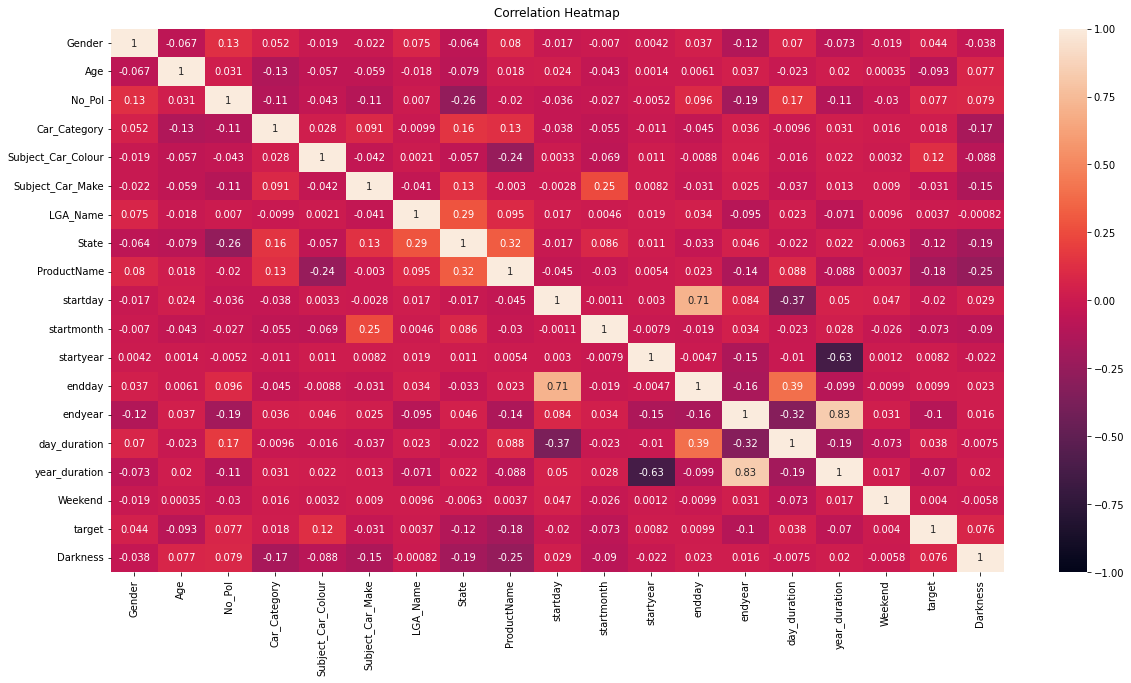

In [64]:
plt.figure(figsize=(20, 10))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df2.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [65]:
max_score = 0
max_dict = {}


while(True):
    
    cols = list(df2.drop(columns=['target']).columns)
    n_cols = len(cols)
    n_feat_to_add = random.randint(2,6)
    try:
        random_features = random.sample(cols,n_feat_to_add)
    except:
        print(cols)
        print(n_feat_to_add)
        break
    for i in range(n_feat_to_add):
        coeffs_dict = {i:j for i,j in zip(random_features,np.random.dirichlet(np.ones(n_feat_to_add),size=1).tolist()[0])}
        df2['added_feature_'+str(i)] = sum([df2[j] * coeffs_dict[j] for j in coeffs_dict.keys()])

        y = df2['target']
        x = df2.drop(columns=['target'])        
        my_fold = StratifiedKFold(n_splits = 5,random_state=2020,shuffle = True)
        score = score2 = score3 = score4 = 0
        #model = lgb.LGBMClassifier(n_estimators=220,num_leaves=100,max_depth=10,min_child_weight=6)

        model3 =CatBoostClassifier(iterations=220,od_type="Iter",l2_leaf_reg=5,learning_rate=0.5,verbose=0, depth=10)
        model4 = RandomForestClassifier(n_estimators=400)

        for i,(train_index,test_index) in enumerate(my_fold.split(x,y)):
            X_train, Y_train = x.iloc[train_index], y.iloc[train_index]
            X_test, Y_test = x.iloc[test_index], y.iloc[test_index]
            
        #    vote_model = VotingClassifier(estimators = [('lgbm',model),('xgb',model2),('dt',model3),('randomforest',model4)],voting='soft')
            model = lgb.LGBMClassifier(n_estimators=220,num_leaves=100,max_depth=10,learning_rate=0.8,min_child_weight=9)
            """model2 = xgb.XGBClassifier()
            model3 =CatBoostClassifier(iterations=220,od_type="Iter",l2_leaf_reg=5,learning_rate=0.5,verbose=0, depth=10)
            model4 = RandomForestClassifier(n_estimators=400)"""
            
            model.fit(X_train,Y_train)
            """model2.fit(X_train,Y_train)
            model3.fit(X_train,Y_train)
            model4.fit(X_train,Y_train)
        """
        #   vote_model.fit(X_train,Y_train)

            y_pred = model.predict(X_test)
            """y_pred2 = model2.predict(X_test)
            y_pred3 = model2.predict(X_test)
            y_pred4 = model2.predict(X_test)"""

        #  y_pred = vote_model.predict(X_test)
        
            
            score += f1_score(y_pred,Y_test)/5
            """score2 += f1_score(Y_test,y_pred2)/5
            score3 += f1_score(Y_test,y_pred3)/5
            score4 += f1_score(Y_test,y_pred4)/5"""
        """X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size=0.3, random_state=2020,shuffle=True)
        
        model = lgb.LGBMClassifier(n_estimators=220,num_leaves=100,max_depth=10,learning_rate=0.8,min_child_weight=9)
        model.fit(X_train,Y_train)
        y_pred = model.predict(X_test)
        score = f1_score(y_pred,Y_test)
        print("--------------------------------------------------------")
        print("Score :",score)"""
        print("Score : ",score)
        print(coeffs_dict)
        if score > max_score:
            max_score = score
            max_dict = coeffs_dict
        print("MAX_SCORE :",max_score)
        print("------------------------------------------------")


    df2 = df2.drop(columns=['added_feature_'+str(i) for i in range(n_feat_to_add)])

df2

Score :  0.2435310428467719
{'startmonth': 0.23603384734310948, 'ProductName': 0.7639661526568906}
MAX_SCORE : 0.2435310428467719
------------------------------------------------
Score :  0.24108318577515567
{'startmonth': 0.4505512147836675, 'ProductName': 0.5494487852163324}
MAX_SCORE : 0.2435310428467719
------------------------------------------------
Score :  0.24942419939805333
{'Subject_Car_Make': 0.4507410129590537, 'ProductName': 0.24369923157086557, 'endday': 0.0548962167925379, 'startday': 0.20835852984224543, 'startmonth': 0.04230500883529745}
MAX_SCORE : 0.24942419939805333
------------------------------------------------


KeyboardInterrupt: 

In [28]:
print(max_dict)
max_score


{'State': 0.38827103669331836, 'year_duration': 0.6117289633066816}


0.2804960498229238

In [187]:
def random_train(feat_list):
    global df2, max_dict1, max_score1
    max_score1 = 0
    max_dict1 = {}


    while(True):
        for i in range(len(feat_list)):
            coeffs_dict = {i:j for i,j in zip(feat_list,np.random.dirichlet(np.ones(len(feat_list)),size=1).tolist()[0])}
            df2['added_feature_'+str(i)] = sum([df2[j] * coeffs_dict[j] for j in coeffs_dict.keys()])

            y = df2['target']
            x = df2.drop(columns=['target'])        
            my_fold = StratifiedKFold(n_splits = 5,random_state=2020,shuffle = True)
            score = score2 = score3 = score4 = 0
            #model = lgb.LGBMClassifier(n_estimators=220,num_leaves=100,max_depth=10,min_child_weight=6)

            model3 =CatBoostClassifier(iterations=220,od_type="Iter",l2_leaf_reg=5,learning_rate=0.5,verbose=0, depth=10)
            model4 = RandomForestClassifier(n_estimators=400)

            for i,(train_index,test_index) in enumerate(my_fold.split(x,y)):
                X_train, Y_train = x.iloc[train_index], y.iloc[train_index]
                X_test, Y_test = x.iloc[test_index], y.iloc[test_index]
                
            #    vote_model = VotingClassifier(estimators = [('lgbm',model),('xgb',model2),('dt',model3),('randomforest',model4)],voting='soft')
                model = lgb.LGBMClassifier(n_estimators=220,num_leaves=100,max_depth=10,learning_rate=0.8,min_child_weight=9)
                """model2 = xgb.XGBClassifier()
                model3 =CatBoostClassifier(iterations=220,od_type="Iter",l2_leaf_reg=5,learning_rate=0.5,verbose=0, depth=10)
                model4 = RandomForestClassifier(n_estimators=400)"""
                
                model.fit(X_train,Y_train)
                """model2.fit(X_train,Y_train)
                model3.fit(X_train,Y_train)
                model4.fit(X_train,Y_train)
            """
            #   vote_model.fit(X_train,Y_train)

                y_pred = model.predict(X_test)
                """y_pred2 = model2.predict(X_test)
                y_pred3 = model2.predict(X_test)
                y_pred4 = model2.predict(X_test)"""

            #  y_pred = vote_model.predict(X_test)
            
                
                score += f1_score(y_pred,Y_test)/5
                """score2 += f1_score(Y_test,y_pred2)/5
                score3 += f1_score(Y_test,y_pred3)/5
                score4 += f1_score(Y_test,y_pred4)/5"""
            """X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size=0.3, random_state=2020,shuffle=True)
            
            model = lgb.LGBMClassifier(n_estimators=220,num_leaves=100,max_depth=10,learning_rate=0.8,min_child_weight=9)
            model.fit(X_train,Y_train)
            y_pred = model.predict(X_test)
            score = f1_score(y_pred,Y_test)
            print("--------------------------------------------------------")
            print("Score :",score)"""
            print("Score : ",score)
            print(coeffs_dict)
            if score > max_score1:
                max_score1 = score
                max_dict1 = coeffs_dict

            print("MAX_SCORE :",max_score1)
            print("---------------------------------------")



        df2 = df2.drop(columns=['added_feature_'+str(i) for i in range(len(feat_list))])

random_train(['ProductName','Age'])


Score :  0.2703071287625908
{'ProductName': 0.8141396971941056, 'Age': 0.1858603028058943}
MAX_SCORE : 0.2703071287625908
---------------------------------------
Score :  0.2702476915999788
{'ProductName': 0.503047587557718, 'Age': 0.496952412442282}
MAX_SCORE : 0.2703071287625908
---------------------------------------
Score :  0.2736783756348377
{'ProductName': 0.6698595283823708, 'Age': 0.33014047161762905}
MAX_SCORE : 0.2736783756348377
---------------------------------------
Score :  0.2582949079525858
{'ProductName': 0.986611421697633, 'Age': 0.013388578302367091}
MAX_SCORE : 0.2736783756348377
---------------------------------------
Score :  0.2642716366810142
{'ProductName': 0.4119630695904168, 'Age': 0.5880369304095832}
MAX_SCORE : 0.2736783756348377
---------------------------------------
Score :  0.27210625637762414
{'ProductName': 0.006599706215771726, 'Age': 0.9934002937842282}
MAX_SCORE : 0.2736783756348377
---------------------------------------
Score :  0.27190999561419

KeyboardInterrupt: 

In [188]:
print(max_score1)
print(max_dict1)

0.27968673567057
{'ProductName': 0.2875629976429384, 'Age': 0.7124370023570616}


In [58]:
"""j = random.random()
s = 0
for i in range(5):
    j = round(random.uniform(0,1-j),2)
    print(j)
    s += j
print("--->",s)"""

np.random.dirichlet(np.ones(n_feat_to_add),size=1).tolist()[0]

[0.054991757437187976, 0.9450082425628121]

In [48]:
0.17369811428343954+0.4434269096006073+0.31961660414422377+0.041810912478097824+0.03236402541408527

1.0109165659204538

In [ ]:
score_list = []
params_list = []

maxdepth_list = range(3,13)
num_leaves_list = random.sample(range(20, 3000), 50)
min_data_in_leaf_list = random.sample(range(100, 200), 6)
max_bin_list = random.sample(range(255, 270), 5)
n_estimat_list = random.sample(range(200, 400), 50)
learning_rate_list = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for p in maxdepth_list:
    for j in num_leaves_list:
        for k in min_data_in_leaf_list:
            for l in max_bin_list:
                for m in max_bin_list:
                    for n in n_estimat_list:
                        for o in learning_rate_list:
                            score = 0
                            for i,(train_index,test_index) in enumerate(my_fold.split(x,y)):
                                X_train, Y_train = x.iloc[train_index], y.iloc[train_index]
                                X_test, Y_test = x.iloc[test_index], y.iloc[test_index]
                                
                            #    vote_model = VotingClassifier(estimators = [('lgbm',model),('xgb',model2),('dt',model3),('randomforest',model4)],voting='soft')
                                model = lgb.LGBMClassifier(n_estimators=n,num_leaves=j,max_depth=p,learning_rate=o,max_bin=l)
                                """model2 = xgb.XGBClassifier()
                                model3 =CatBoostClassifier(iterations=220,od_type="Iter",l2_leaf_reg=5,learning_rate=0.5,verbose=0, depth=10)
                                model4 = RandomForestClassifier(n_estimators=400)"""
                                
                                model.fit(X_train,Y_train)
                                """model2.fit(X_train,Y_train)
                                model3.fit(X_train,Y_train)
                                model4.fit(X_train,Y_train)
                            """
                            #   vote_model.fit(X_train,Y_train)

                                y_pred = model.predict(X_test)
                                """y_pred2 = model2.predict(X_test)
                                y_pred3 = model2.predict(X_test)
                                y_pred4 = model2.predict(X_test)"""

                            #  y_pred = vote_model.predict(X_test)
                            
                                
                                score += f1_score(y_pred,Y_test)/5
                                """score2 += f1_score(Y_test,y_pred2)/5
                                score3 += f1_score(Y_test,y_pred3)/5
                                score4 += f1_score(Y_test,y_pred4)/5"""

                            #    score += f1_score(Y_test,y_pred)/5


                            print('Light GBM :',score)
                            
                            score_list.append(score)
                            params_list.append([j,k,l,m,n,o,p])

score_list
                            

Light GBM : 0.15292100617493393
Light GBM : 0.19442833607591742
Light GBM : 0.2074930962834908
Light GBM : 0.2167032705736317
Light GBM : 0.2279586639119217
Light GBM : 0.22251836378961387
Light GBM : 0.2376757828503559
Light GBM : 0.24140644296057476
Light GBM : 0.2550833584441856
Light GBM : 0.13662885713904394
Light GBM : 0.17094497055361269
Light GBM : 0.20676768382765015
Light GBM : 0.20475464697709628
Light GBM : 0.20529752898245748
Light GBM : 0.21512240157101753
Light GBM : 0.22776774816968026
Light GBM : 0.23811256410795267
Light GBM : 0.2422449853632344
Light GBM : 0.13194937512020433
Light GBM : 0.17316700324826495
Light GBM : 0.1948727706556611
Light GBM : 0.20017270772072887


KeyboardInterrupt: 

In [ ]:
max(score_list)

0.2660277934853381




last score : 0.25


    features count  f1_score      score function
0              1.0     0.082          chi square
1              2.0     0.082          chi square
2              3.0     0.082          chi square
3              4.0     0.085          chi square
4              5.0     0.150          chi square
5              6.0     0.190          chi square
6              7.0     0.215          chi square
7              8.0     0.243          chi square
8              9.0     0.260          chi square
9             10.0     0.252          chi square
10            11.0     0.262          chi square
11            12.0     0.284          chi square
12            13.0     0.284          chi square
13            14.0     0.262          chi square
14            15.0     0.242          chi square
15            16.0     0.270          chi square
16            17.0     0.266          chi square
17            18.0     0.289          chi square
18            19.0     0.266          chi square
19            20.0  

<AxesSubplot:xlabel='features count', ylabel='f1_score'>

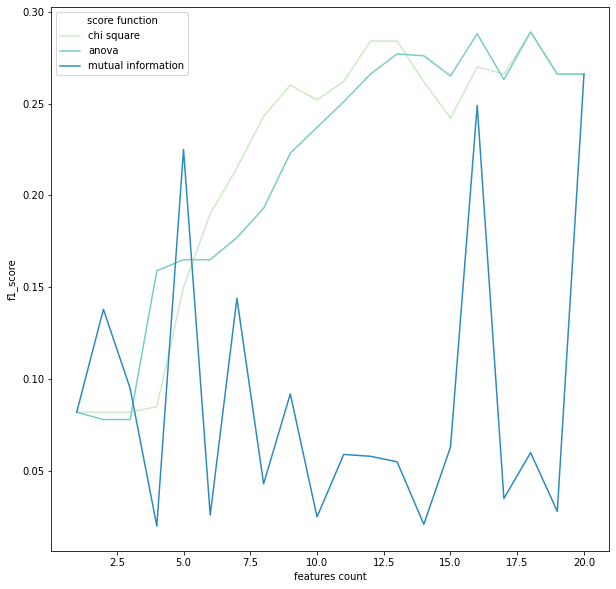

In [ ]:
from sklearn. feature_selection import SelectKBest
from sklearn. feature_selection import chi2
from sklearn. feature_selection import f_classif
from sklearn. feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size=0.3, random_state=2020,shuffle=True)
variable_counts = 11
# define feature selection - filter methods function
def feature_selection(variable_counts, score_function) :
    selection_model = SelectKBest(score_func=score_function, k=variable_counts) # create a selection model based on the score function
    selection = selection_model.fit(X_train, Y_train) # fit the selection to the data
    features_selected = X_train.columns[selection.get_support()] # get the selected variables
    X_train_selected = selection_model.fit_transform(X_train, Y_train) # transform the trainig data based on selected features
    # calculate the accuracy of prediction based on selected features
    reg = lgb.LGBMClassifier(n_estimators=220,num_leaves=100,max_depth=10,learning_rate=0.8,min_child_weight=9)
    reg.fit(X_train_selected, Y_train)
    y_pred = reg.predict(X_test[features_selected])
    return metrics.f1_score(Y_test , y_pred)

f1_score_df = pd.DataFrame({"features count":[],"f1_score": [], "score function": []})
function_list = [chi2, f_classif,mutual_info_classif]
function_name = ["chi square","anova","mutual information"]
for j in range(len(function_list)) :
    func = function_list[j]
    func_name = function_name[j]
    for i in range(1, len(df1.columns)- 1):
        f1_score = feature_selection(i, func)
        new_record = {"features count": round(i), "f1_score": round (f1_score, 3),"score function": func_name}
        f1_score_df = f1_score_df.append(new_record, ignore_index = True)
print (f1_score_df)
plt.figure(figsize = (10, 10))
sns.lineplot(data = f1_score_df, x="features count",y="f1_score", hue ="score function", palette = "GnBu")

              features        scores
8          ProductName  7.153692e+01
19            Darkness  3.606206e+01
4   Subject_Car_Colour  2.030587e+01
2               No_Pol  1.576827e+01
13            endmonth  6.191735e+00
1                  Age  5.397191e+00
10          startmonth  4.637600e+00
5     Subject_Car_Make  1.834072e+00
9             startday  9.373328e-01
7                State  8.368316e-01
0               Gender  3.671958e-01
14             endyear  3.389512e-01
17       year_duration  2.428561e-01
3         Car_Category  2.354652e-01
18             Weekend  2.320926e-01
12              endday  1.269710e-01
15        day_duration  1.049882e-01
6             LGA_Name  4.971110e-02
16      month_duration  4.689866e-03
11           startyear  9.359110e-09
AxesSubplot(0.125,0.125;0.775x0.755)
              features      scores
8          ProductName  372.684145
14             endyear  110.400494
4   Subject_Car_Colour   92.338251
1                  Age   78.839040
2          

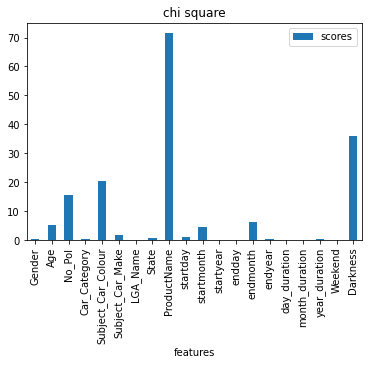

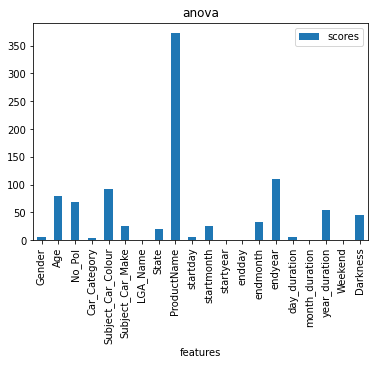

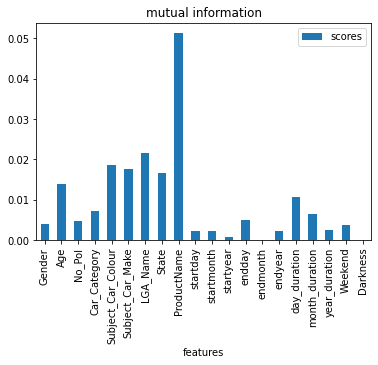

In [ ]:
for i in range(len(function_list)):
    function = function_list[i]
    name = function_name[i]
    selection_model = SelectKBest(score_func = function, k = 8).fit(X_train, Y_train)
    feature_score = pd.DataFrame({"features": X_train.columns.values, "scores": selection_model.scores_})
    print(feature_score.sort_values(by = ['scores'], ascending = False))
    print(feature_score.plot(x = "features", kind = 'bar', title = name))

In [15]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# forward selection
accuracy_df = pd.DataFrame({"features count": [], "accuracy": [], "score function": []})
for i in range(1, len(df.columns) - 1):
    sfs = SFS(lgb.LGBMClassifier(),
              k_features = i,
              forward = True, 
              scoring = 'accuracy')
    
    X_train_selected = sfs.fit_transform(X_train, Y_train)
    reg = lgb.LGBMClassifier()
    reg.fit(X_train_selected, Y_train)
    y_pred = reg.predict(X_test[list(sfs.k_feature_names_)])
    sfs_accuracy = metrics.accuracy_score(Y_test, y_pred)
    
    new_record = {"features count": round(i), "accuracy": round(sfs_accuracy, 3), "score function": "forward selection"}
    accuracy_df = accuracy_df.append(new_record, ignore_index = True)



STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

In [ ]:
modell = tree.DecisionTreeClassifier()
modell.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:

#----------------------Automated feature Engineering ----------------------------------------------
es = ft.EntitySet(id='First Entity')
es.add_dataframe(dataframe=date_entity,index="ID",dataframe_name='date',make_index=False)
es.add_dataframe(dataframe=person_entity,index='ID_pers',dataframe_name='person',make_index=True)
es.add_dataframe(dataframe=car_entity,index='ID_car',dataframe_name='car',make_index=True)

rel = ft.Relationship(entityset=es,parent_dataframe_name='person',parent_column_name='ID_pers',child_dataframe_name='date',child_column_name='ID')
rel2 = ft.Relationship(entityset=es,parent_dataframe_name='person',parent_column_name='ID',child_dataframe_name='car',child_column_name='ID')
rel3 = ft.Relationship(entityset=es,parent_dataframe_name='date',parent_column_name='ID',child_dataframe_name='car',child_column_name='ID')
es.add_relationship(relationship=rel2)
es.add_relationship(relationship= rel)
es.add_relationship(relationship=rel3)
es
features, feature_names = ft.dfs(entityset = es, target_dataframe_name='person',
                                 agg_primitives = ['mean', 'max', 'percent_true', 'last'])

features

features = features.drop(columns=['Gender','Age'])

for i in features.columns:
    if i != 'Gender' and i != 'Age':
        df1[i] = list(features[i])

for i in df1.columns:
    #Replacing dates with their corresponding days in the week
    
    if i != 'target':
#        if 'Date' in i:
#            df1[i] = df1[i].apply(lambda y: pd.Timestamp(y).day_name())

        #Same thing Using Label encoder:
        df1[i] = LabelEncoder().fit_transform(df1[i])

df1 = minmax_scaling(df1,columns=[i for i in df1.columns if i != 'target'])
df1['target'] = [j for j in df.target]
features

,ID,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,0.000000,0.428571,0.162162,0.000000,0.000000,0.500,0.088889,0.905405,0.612403,0.612403,0.125000,0
1,0.000083,0.142857,0.824324,0.166667,0.000000,0.125,0.577778,0.905405,0.612403,0.612403,0.125000,1
2,0.000166,0.428571,0.337838,0.500000,0.000000,0.500,0.711111,0.905405,0.612403,0.612403,0.125000,0
3,0.000248,0.428571,0.364865,0.333333,0.000000,0.500,0.155556,0.612403,0.612403,0.612403,0.625000,0
4,0.000331,0.000000,0.027027,0.500000,0.285714,0.500,0.155556,0.612403,0.608527,0.657658,0.612403,1
...,...,...,...,...,...,...,...,...,...,...,...,...
12074,0.999669,0.142857,0.162162,0.833333,0.000000,0.500,0.088889,0.783784,0.399225,0.414414,0.125000,1
12075,0.999752,0.142857,0.554054,0.500000,0.000000,0.500,0.155556,0.612403,0.612403,0.612403,0.125000,0
12076,0.999834,0.428571,0.216216,0.500000,0.000000,0.500,0.155556,0.612403,0.612403,0.612403,0.625000,0
12077,0.999917,0.612403,0.364865,0.333333,0.142857,0.500,0.844444,0.905405,0.957364,0.657658,0.000000,0


In [ ]:
model3 = lgb.LGBMClassifier(n_estimators=222)

model3.fit(X_train,Y_train)

y_pred3 = model3.predict(X_test)

f1_score(Y_test,y_pred3)

TypeError: 'numpy.float64' object is not callable

In [ ]:
model4 = xgb.XGBClassifier()

model4.fit(X_train,Y_train)

y_pred4 = model4.predict(X_test)

f1_score(Y_test,y_pred4)

0.19047619047619047

In [ ]:
df

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
4,ID_00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12074,ID_ZZA1SES,2010-05-25,2011-05-24,Female,30,2010-05-25,1,NaN,Black,Range Rover,Ibeju/Lekki,Ibeju-Lekki,Car Classic,1
12075,ID_ZZDAC3K,2010-10-03,2011-10-02,Female,59,2010-10-03,1,NaN,NaN,NaN,NaN,NaN,Car Classic,0
12076,ID_ZZIU2XC,2010-10-10,2011-10-08,Male,34,2010-10-10,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
12077,ID_ZZRQ1NF,2010-02-27,2011-02-26,NaN,120,2010-02-27,2,NaN,White,TOYOTA,Victoria Island,Lagos,CVTP,0


In [ ]:
df.isnull().sum()

ID                           0
Policy Start Date            0
Policy End Date              0
Gender                     359
Age                          0
First Transaction Date       0
No_Pol                       0
Car_Category              3738
Subject_Car_Colour        6962
Subject_Car_Make          2476
LGA_Name                  6476
State                     6488
ProductName                  0
target                       0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12079 entries, 0 to 12078
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      12079 non-null  object
 1   Policy Start Date       12079 non-null  object
 2   Policy End Date         12079 non-null  object
 3   Gender                  11720 non-null  object
 4   Age                     12079 non-null  int64 
 5   First Transaction Date  12079 non-null  object
 6   No_Pol                  12079 non-null  int64 
 7   Car_Category            8341 non-null   object
 8   Subject_Car_Colour      5117 non-null   object
 9   Subject_Car_Make        9603 non-null   object
 10  LGA_Name                5603 non-null   object
 11  State                   5591 non-null   object
 12  ProductName             12079 non-null  object
 13  target                  12079 non-null  int64 
dtypes: int64(3), object(11)
memory usage: 1.3+ MB


remove car color : Done

replace car color and car category with mean : Done

deal with LGA_name : Done


remove SEX : Done

Try median (best parameters found : lga_name : median | car_category : mean| car_colour : median) (added 0.02 to my score )

Feature modeling : Doing rn

deal with state

lgb hyperparameters

Voting Classifier

Automatic feature adding algorithm